In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

In [8]:
def plot_fun(f, a, b, label="", color="r", step=0.01, ax=plt, title="Wykre funkcji"):
    n = int((b-a)/step)+1
    x = np.linspace(a,b,n)
    ax.plot(x, [f(xi) for xi in x], color=color, label=label)
    if label:
        ax.legend(loc="best")

    if ax is plt:
        ax.title(title)
        ax.xlabel("x")
        ax.ylabel("y")
    else:
        ax.set_title(title)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    ax.grid()


In [9]:
def interpolation_lagrange(x, y):
    m = []
    for xi in x:
        t = 1
        for xj in x:
            if xi != xj:
                t *= (xi-xj)
        m.append(t)

    def f(x0):
        res = 0
        for i, yi in enumerate(y):
            d = 1
            for j, xj in enumerate(x):
                if i != j:
                    d *= (x0-xj)
            res += d*yi/m[i]

        return res

    return f 

In [10]:
def interpolation_newton(x, y):
    n = len(x)
    b = list(y)
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            b[j] = (b[j]-b[j-1])/(x[j]-x[j-i])

    def f(x0):
        diff = [1] + [x0-x[i] for i in range(n-1)]
        y = 0
        coeff = 1
        for bi, d in zip(b, diff):
            coeff *= d
            y += bi*coeff
        
        return y
    
    return f

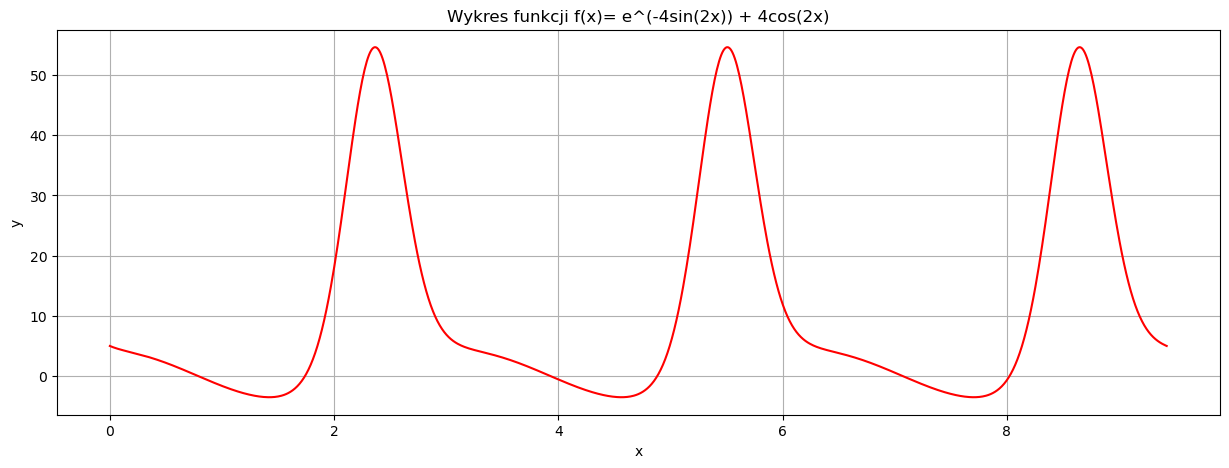

In [11]:
f = lambda x, k, m: math.e**(-k*math.sin(m*x)) + k*math.cos(m*x) 

g = lambda x: f(x, 4, 2)

plt.figure(figsize=(15,5))
plot_fun(g, 0, 3*math.pi, title="Wykres funkcji f(x)= e^(-4sin(2x)) + 4cos(2x)") 
plt.show()

In [12]:
def czebyszew_node(a, b, n):
    return [0.5*(a+b)+0.5*(b-a)*math.cos((2*i - 1)/(2*n)*math.pi) for i in range(n, 0, -1)]

def interpolate_options(x, y, options="lagrange"):
    W = []
    labels = []
    for o in options:
        match o:
            case "lagrange":
                W.append(interpolation_lagrange(x, y))
                labels.append("Lagrange\n")
            case "newton":
                W.append(interpolation_newton(x, y))
                labels.append("Newton\n")
    return W, labels

def interpolation_plot(ax, f, W, a, b, colors='g', label="", title=""):
    plot_fun(f, a, b, color="pink", label='f', ax=ax)
    for Wi, option, c in zip(W, label, colors):
        plot_fun(Wi, a, b, label=option, title=title, ax=ax, color=c)

    

In [13]:
def abs_diff(f, W, x):
    return [abs(f(xi) - W(xi)) for xi in x]

def max_diff(f, W, x):
    return max(abs_diff(f, W, x))

def mean_square_error(f, W, x):
    return sum(d ** 2 for d in abs_diff(f, W, x))

def errors_table(f, W, a, b, N, labels, msg):
    precision = 5
    xs = np.linspace(a, b, N)
    label_just = max(len(label) for label in labels) + 14
    
    for W, label in zip(W, labels):
        diffs = abs_diff(f, W, xs)
        print(tabulate([
                ('Max bezwzględny błąd', max(diffs)),
                ('Suma kwadratów różnic', sum(x ** 2 for x in diffs))
            ], [
                f'Interpolacja {msg} {label}'.ljust(label_just)
            ], tablefmt='fancy_grid', floatfmt=f'.{precision}f')
        )

In [44]:
def interpolate(f, a, b, n, options=("lagrange", "newton"), title=""):
    fig, ax = plt.subplots(1, figsize=(15,7))
    
    x = np.linspace(a, b, n)
    y = np.array([f(xi) for xi in x])

    W, labels = interpolate_options(x, y) if not options else interpolate_options(x, y, options=options)
    
    """interpolation_plot(ax, f, W, a, b, colors='rgb', title=f"Rozkład równomierny z {n} węzłami", label=labels)
    ax.scatter(x, y, c="black")
    errors_table(f, W, a, b, 1000, labels, "równomierna")"""

    x = czebyszew_node(a,b,n)
    y = np.array([f(xi) for xi in x])

    W, labels = interpolate_options(x, y) if not options else interpolate_options(x, y, options=options)
    interpolation_plot(ax, f, W, a, b, colors='rgb', title=f"Rozkład z {n} węzłami Czebyszewa", label=labels)
    ax.scatter(x, y, c="black")
    errors_table(f, W, a, b, 1000, labels, "z węzłami Czebyszewa")
    plt.show()


╒═══════════════════════╤══════════════════════════════════════════════╕
│                       │   Interpolacja z węzłami Czebyszewa Lagrange │
│                       │                                              │
╞═══════════════════════╪══════════════════════════════════════════════╡
│ Max bezwzględny błąd  │                                     61.75907 │
├───────────────────────┼──────────────────────────────────────────────┤
│ Suma kwadratów różnic │                                 556824.97067 │
╘═══════════════════════╧══════════════════════════════════════════════╛
╒═══════════════════════╤════════════════════════════════════════════╕
│                       │   Interpolacja z węzłami Czebyszewa Newton │
│                       │                                            │
╞═══════════════════════╪════════════════════════════════════════════╡
│ Max bezwzględny błąd  │                                   61.75907 │
├───────────────────────┼────────────────────────────────────

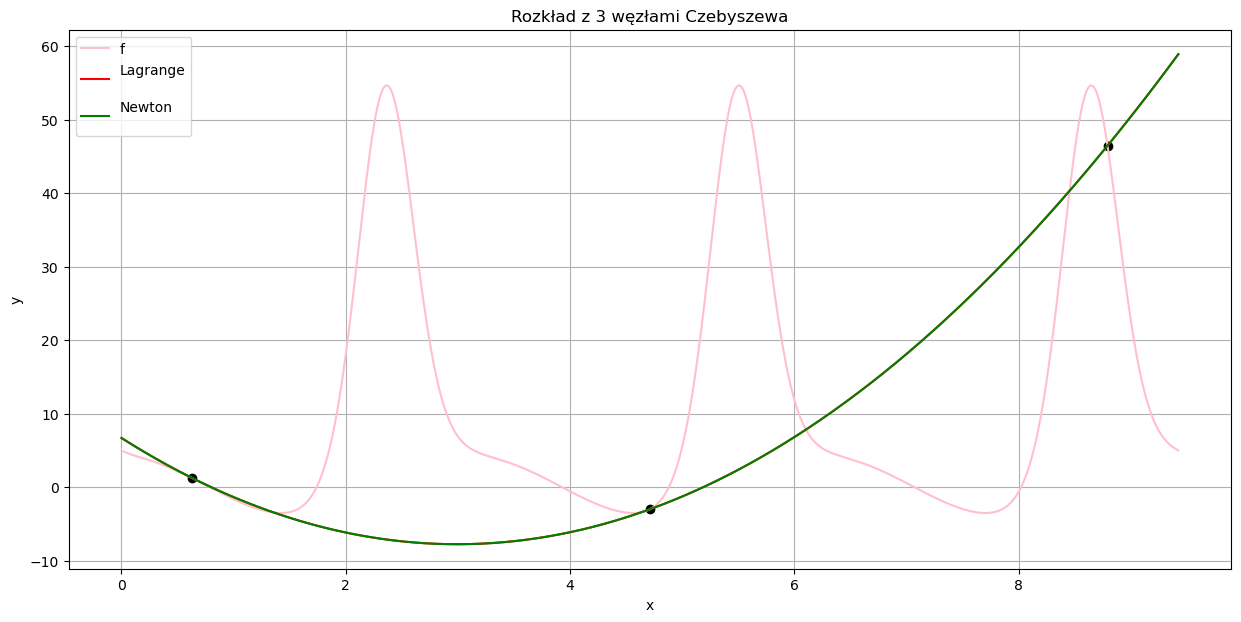

In [51]:
interpolate(g, 0, 3*math.pi, 3)

╒═══════════════════════╤═════════════════════════════════════╕
│                       │   Interpolacja równomierna Lagrange │
│                       │                                     │
╞═══════════════════════╪═════════════════════════════════════╡
│ Max bezwzględny błąd  │                       4236751.68721 │
├───────────────────────┼─────────────────────────────────────┤
│ Suma kwadratów różnic │               299168189803659.37500 │
╘═══════════════════════╧═════════════════════════════════════╛
╒═══════════════════════╤═══════════════════════════════════╕
│                       │   Interpolacja równomierna Newton │
│                       │                                   │
╞═══════════════════════╪═══════════════════════════════════╡
│ Max bezwzględny błąd  │                     4236751.68738 │
├───────────────────────┼───────────────────────────────────┤
│ Suma kwadratów różnic │             299168189805765.68750 │
╘═══════════════════════╧═════════════════════════════

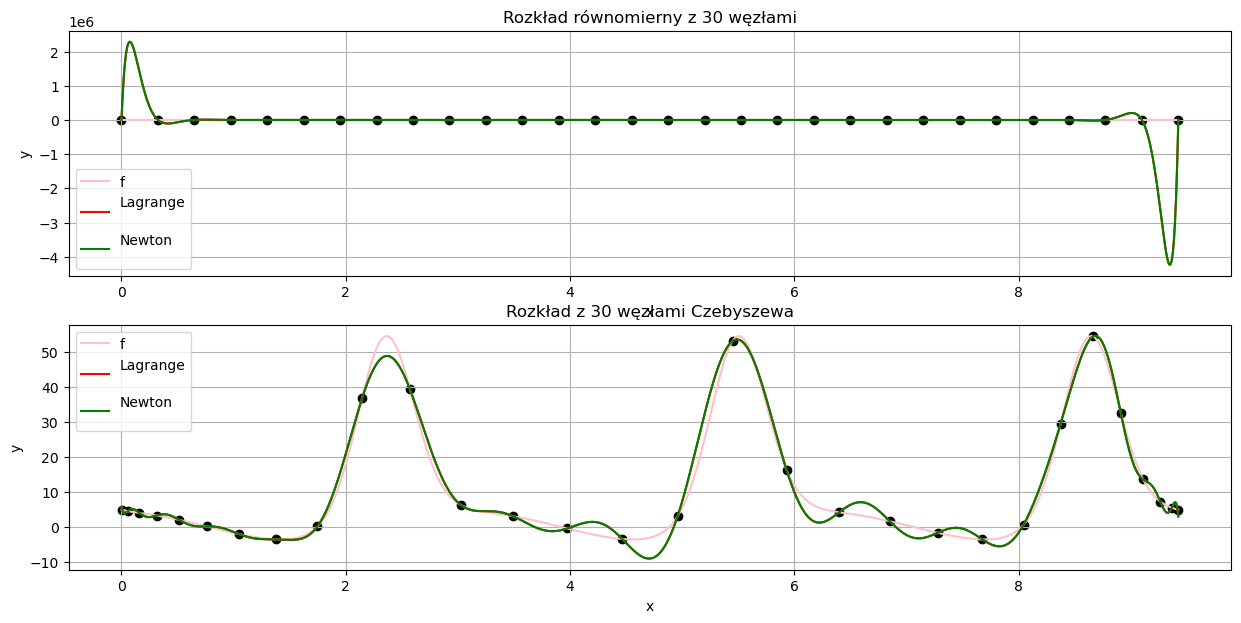

In [33]:
interpolate(g, 0, 3*math.pi, 30)

╒═══════════════════════╤═════════════════════════════════════╕
│                       │   Interpolacja równomierna Lagrange │
│                       │                                     │
╞═══════════════════════╪═════════════════════════════════════╡
│ Max bezwzględny błąd  │                          2508.56082 │
├───────────────────────┼─────────────────────────────────────┤
│ Suma kwadratów różnic │                     328965062.23432 │
╘═══════════════════════╧═════════════════════════════════════╛
╒═══════════════════════╤═══════════════════════════════════╕
│                       │   Interpolacja równomierna Newton │
│                       │                                   │
╞═══════════════════════╪═══════════════════════════════════╡
│ Max bezwzględny błąd  │                        2508.56082 │
├───────────────────────┼───────────────────────────────────┤
│ Suma kwadratów różnic │                   328965062.23432 │
╘═══════════════════════╧═════════════════════════════

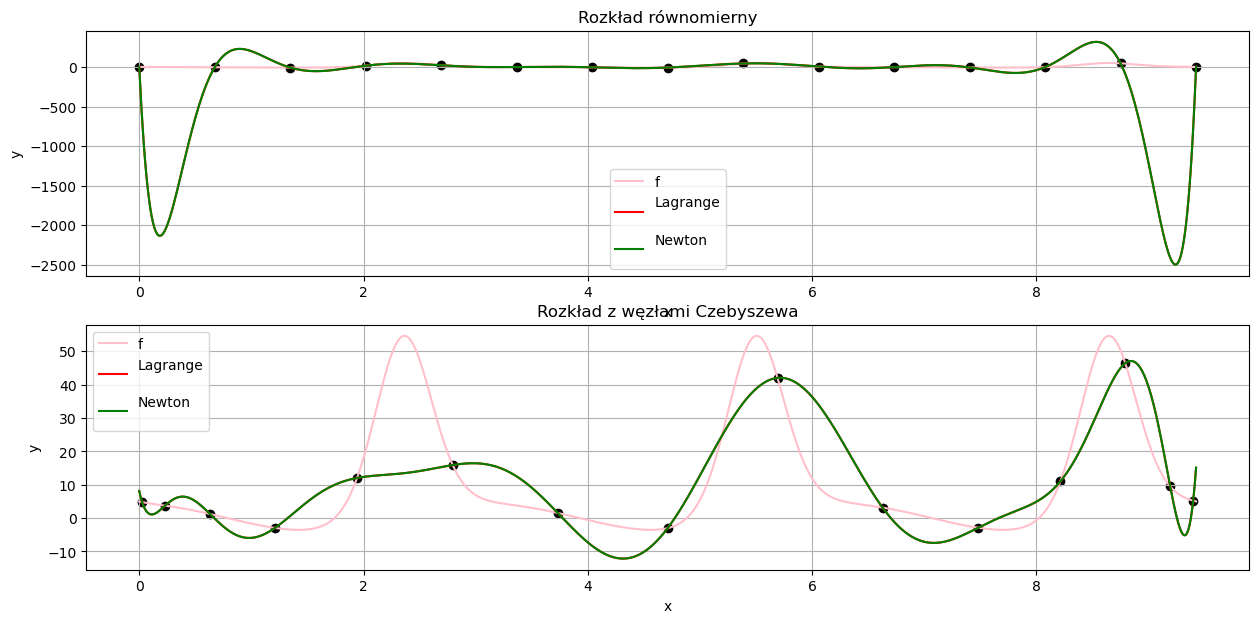

In [17]:
interpolate(g, 0, 3*math.pi, 15)

╒═══════════════════════╤═════════════════════════════════════╕
│                       │   Interpolacja równomierna Lagrange │
│                       │                                     │
╞═══════════════════════╪═════════════════════════════════════╡
│ Max bezwzględny błąd  │                          1205.11862 │
├───────────────────────┼─────────────────────────────────────┤
│ Suma kwadratów różnic │                     103350287.66740 │
╘═══════════════════════╧═════════════════════════════════════╛
╒═══════════════════════╤═══════════════════════════════════╕
│                       │   Interpolacja równomierna Newton │
│                       │                                   │
╞═══════════════════════╪═══════════════════════════════════╡
│ Max bezwzględny błąd  │                        1205.11862 │
├───────────────────────┼───────────────────────────────────┤
│ Suma kwadratów różnic │                   103350287.66741 │
╘═══════════════════════╧═════════════════════════════

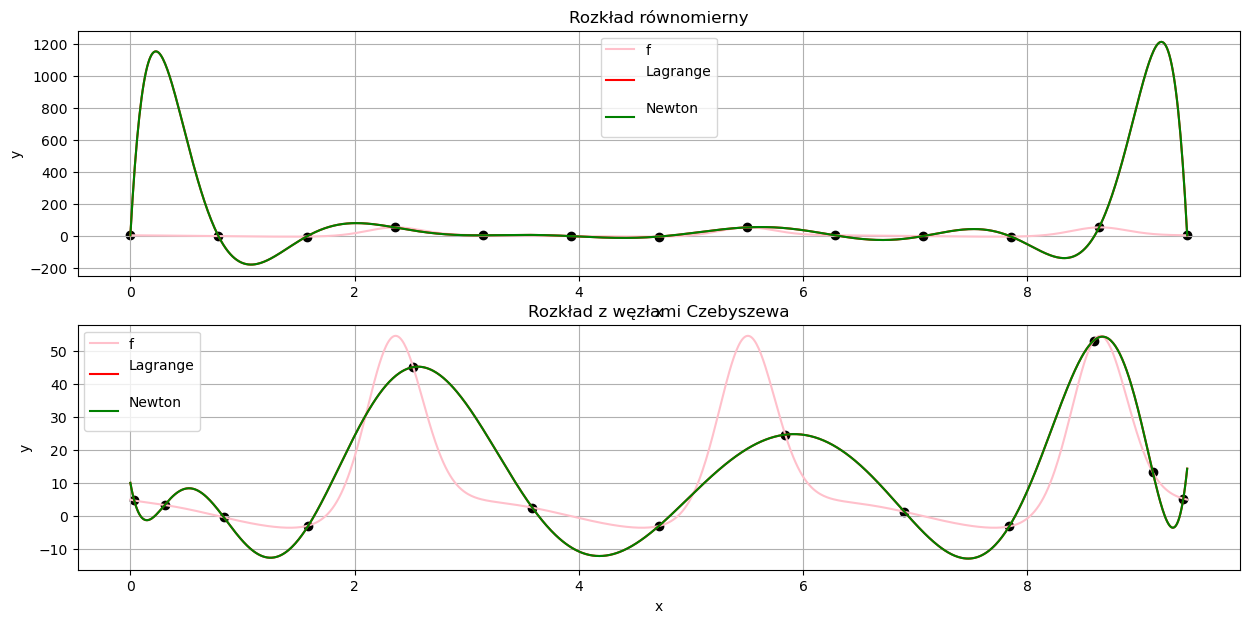

In [18]:
interpolate(g, 0, 3*math.pi, 13)

In [19]:
def calculate_errors(f, W, labels, n, a, b, N, criteria):
    res = {}
    x = np.linspace(a, b, N)
    
    for W, label in zip(W, labels):
        res[label] = {
            'err': criteria(f, W, x),
            'W': W,
            'n': n
        }
            
    return res

def best_polynomial(f, a, b, limit, N, nodes=np.linspace, options=("lagrange", "newton")):

    def update_best_polys(best, errors):
        for k, v in errors.items():
            if k not in best or best[k]['err'] > errors[k]['err']:
                best[k] = v

    polynomials = dict()
    for _ in range(2, limit+1):
        x = nodes(a, b, N)
        y = [f(xi) for xi in x]
        W, labels = interpolate_options(x, y, options=options)
        curr_errors = calculate_errors(f, W, labels, N, a, b, N, mean_square_error)
        update_best_polys(polynomials, curr_errors)
        
    return polynomials
        

In [20]:
from time import time

start_time = time()
print(*(f'''Metoda {k}:
Stopień wielomianu: {v['n'] - 1}
Błąd: {v['err']}
''' for k, v in best_polynomial(g, 0, 3*math.pi, limit=100, N=100).items()), sep='\n')
end_time = time()
print(f"Czas obliczeń: {end_time-start_time}")

Metoda Lagrange
:
Stopień wielomianu: 99
Błąd: 1.3965303212740725e-29

Metoda Newton
:
Stopień wielomianu: 99
Błąd: 2.505058193721768e+46

Czas obliczeń: 7.9260947704315186


In [21]:
start_time = time()
res = best_polynomial(g, 0, 3*math.pi, limit=200, N=100, nodes=czebyszew_node)
end_time = time()
res_L = res['Lagrange\n']
print(f"Stopień wielomianu z najlepszym dopaswoaniem: {res_L['n']}")

Stopień wielomianu z najlepszym dopaswoaniem: 100


╒═══════════════════════╤═══════════════════╕
│                       │   Interpolacja  L │
╞═══════════════════════╪═══════════════════╡
│ Max bezwzględny błąd  │           0.00024 │
├───────────────────────┼───────────────────┤
│ Suma kwadratów różnic │           0.00001 │
╘═══════════════════════╧═══════════════════╛


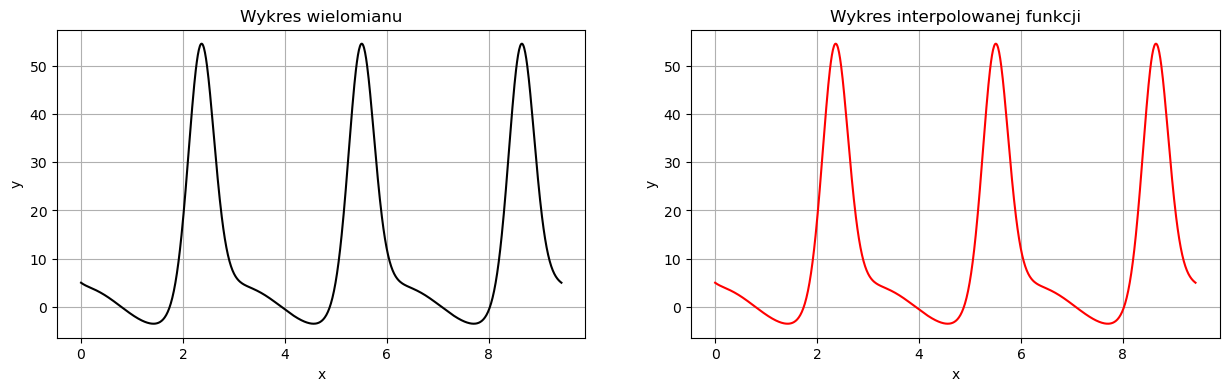

In [22]:
W = res_L['W']
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

plot_fun(g, 0, 3*math.pi, step=.01, color='black', title='Wykres wielomianu', ax=ax[0])
plot_fun(W, 0, 3*math.pi, step=.01, title='Wykres interpolowanej funkcji', ax=ax[1])
errors_table(g, [W], 0, 3*math.pi, N=1000, labels="Lagrange", msg="")